<a href="https://colab.research.google.com/github/riskydevandra/soft_computing_praktik/blob/main/nndl_m13b_5200411476.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Risky devandra hartana  

---
NIM : 5200411476


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
#inisialisasi parameter GA
list_semua_lokasi = [[5,20],[30,10],[5,10],[18,23],[15,15],[11,35],[75,20],[60,30],[45,12],[22,22],
                     [0,2],[50,40],[45,35],[60,25],[15,25], [15,25],[20,5],[55,20],[60,50],[45,30],[50,60],
                     [60,10],[35,30],[45,20],[15,25],[47,50],[55,59],[40,20],[70,50],[68,34],[10,10]]

list_lokasi = list_semua_lokasi[0:30]
uk_pop=200
max_generasi= 200
jum_var=len(list_lokasi)
jum_gen_per_var = 1
jum_gen=jum_var * jum_gen_per_var
pc=0.8
pm=1/jum_gen
best_kromosom = []
idx_best_kromosom = 0
list_best_fitness = []
best_fitness = 0

In [ ]:
#inisiasi populasi permutasi
kromosom = []
for i in range(uk_pop):
  single_kromosom = []

  for j in range(len(list_lokasi)):
    single_kromosom.append(j)

    random.shuffle(single_kromosom)
    kromosom.append(single_kromosom)

In [ ]:
def hitung_fitness(x):
  total_jarak = 0

  for i in range (len(x)):
    if (i == (len(x)- 1)):
      x1 = list_lokasi [x[i]][0]
      y1 = list_lokasi [x[i]][1]
      x1 = list_lokasi [x[0]][0]
      y2 = list_lokasi [x[0]][1]
    else:
      x1 = list_lokasi [x[i]][0]
      y1 = list_lokasi [x[i]][1]
      x2 = list_lokasi [x[i+1]][0]
      y2 = list_lokasi [x[i+1]][1]
    total_jarak = total_jarak + ((x1-x2)**2+(y1-y2)**2)**0.5

  fitness= 1/(total_jarak)

  return fitness, total_jarak

In [ ]:
def linear_fitness_ranking(fitness):
  sort_fitness = sorted(fitness)
  max_fitness = sort_fitness[-1]
  min_fitness = sort_fitness[0]
  LFR = []
  for i in range(uk_pop):
    LFR.append(max_fitness- (max_fitness-min_fitness)*((i+1)-1)/(uk_pop-1))
    return LFR

In [ ]:
def roulette_wheel (krom,fitness):
  LFR= linear_fitness_ranking(fitness)


  kumulatif_fitness = 0
  acak = random.uniform(0,1)
  idx_induk = 0
  for i in range(uk_pop):
    kumulatif_fitness = kumulatif_fitness + (LFR[i]/sum(LFR))
    if (kumulatif_fitness >acak):
      idx_induk = i
      break
  return idx_induk

In [ ]:
def order_crossover (krom1, krom2):
  anak1 = list (krom1)
  anak2 = list (krom2)
  
  titik1 = int(random.uniform(1, (0.8*jum_gen))+1)
  titik2 = titik1 + int(random.uniform(1,(jum_gen - titik1)))

  temp_anak1 = krom2[titik1:titik2]
  temp_anak2 = krom1[titik1:titik2]
  anak1[titik1:titik2] = temp_anak1
  anak2 [titik1:titik2] = temp_anak2

  sisa_anak1 = list(set(krom2)-set(temp_anak1))
  sisa_anak2 = list(set(krom1)-set(temp_anak2))

  for i in range(len(sisa_anak1)):
    if (titik2 == len(krom1)):
      titik2 = 0

    anak1[titik2] = sisa_anak1[i]
    anak2[titik2] = sisa_anak2[i]

    titik2 += 1

  return anak1 , anak2

In [ ]:
def swap_mutasi(krom):
  for i in range (len(krom)):
    acak = random.uniform(0,1)
    if (acak<=pm):
      titik_acak = int(random.uniform(1,len(krom)))
      krom[1],krom[titik_acak]= krom[titik_acak],krom[i]

  return krom

In [ ]:
#mutasi pertukaran
def swap_mutation(krom) :
  for i in range(len(krom)):
    acak = random.uniform(0,1)
    if (acak <= pm):
      titik_acak = int(random.uniform(1, len(krom)))
      krom[i], krom[titik_acak] = krom[titik_acak], krom[i]

  return krom

In [ ]:
#-----------------------
#proses evolusi kromosom
#______________________

generasi = 0 
while (generasi < max_generasi ) :
  # evaluasi fitness
  fitness = []
  for j in range(uk_pop):
    fit, tot = hitung_fitness(kromosom[j])
    fitness.append(fit)

    if (best_fitness < fit):
      best_fitness = fit
      min_distance = tot
      idx_best_kromosom = j
      best_kromosom = kromosom[j].copy()
      best_genotipe = best_kromosom.copy() # karena tidak ada dekode kromosom

  #simpan best_fitness dari semua kromosom di tiap generasi
  list_best_fitness.append(best_fitness)

  #tampilkan informasi tiap generasi
  print("Generasi ke - " + str(generasi) + " ==> " + str(best_genotipe) + " = " + str(best_fitness) + "(" + str(min_distance))

  #elitisme
  kromosom_anak = []
  if (uk_pop % 2 == 0) :
    kromosom_anak.append(best_kromosom.copy())
    kromosom_anak.append(best_kromosom.copy())
    iterasi_mulai = 2

  else :
    kromsom_anak.append(best_kromosom.copy())
    iterasi_mulai = 1

  #seleksi induk / orang tua
  idx_induk = []
  for i in range(iterasi_mulai, uk_pop) :
    idx_induk.append(roulette_wheel(kromosom, fitness))
  

  #crossover kromosom
  jum_pasangan_induk = int(len(idx_induk)/2)
  for i in range (jum_pasangan_induk) :
    induk1 = kromosom[idx_induk[i]]
    induk2 = kromosom[idx_induk[i+1]]
    acak = random.uniform(0 ,1)

    if (acak <= pc):
      anak1, anak2 = order_crossover(induk1, induk2)
  
      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())

    else :
      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())
    i += 2

  #mutasi kromosom (kromoosom elit tidak dimutasi)
  for i in range(iterasi_mulai, uk_pop) :
    kromosom_anak[i] = swap_mutation(kromosom_anak[i])

  #generational replacement
  kromosom = kromosom_anak.copy()

  generasi += 1


Generasi ke - 0 ==> [10, 23, 12, 25, 8, 2, 5, 16, 20, 21, 22, 27, 1, 9, 3, 24, 19, 15, 11, 29, 28, 14, 26, 4, 17, 6, 13, 18, 7, 0] = 0.001100171347603436(908.9493215564604
Generasi ke - 1 ==> [6, 7, 8, 11, 10, 9, 12, 24, 14, 15, 16, 17, 18, 20, 21, 22, 23, 13, 25, 26, 27, 28, 29, 19, 0, 1, 2, 3, 4, 5] = 0.0012394584599412198(806.8039650537576
Generasi ke - 2 ==> [18, 19, 20, 21, 23, 1, 25, 26, 28, 29, 22, 27, 24, 9, 3, 0, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17] = 0.0013450733158474552(743.453898176514
Generasi ke - 3 ==> [25, 26, 27, 28, 29, 9, 12, 24, 14, 15, 16, 0, 10, 2, 3, 4, 5, 6, 7, 8, 1, 11, 13, 17, 18, 19, 20, 21, 22, 23] = 0.0013665854740495256(731.7507898256496
Generasi ke - 4 ==> [17, 18, 19, 20, 21, 23, 25, 26, 28, 29, 22, 27, 24, 9, 3, 0, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 1] = 0.0014043811531497903(712.0574053255903
Generasi ke - 5 ==> [25, 26, 12, 28, 29, 9, 27, 24, 14, 15, 16, 0, 10, 2, 3, 1, 4, 5, 6, 7, 8, 11, 13, 17, 18, 19, 20, 21, 22, 23] = 0.00

jarak terpendek = 431.22373451376797(165)
Best kromosom = [27, 23, 21, 28, 29, 9, 3, 24, 14, 15, 5, 0, 10, 2, 16, 1, 4, 22, 6, 7, 18, 26, 20, 25, 11, 12, 19, 13, 17, 8]


<function matplotlib.pyplot.waitforbuttonpress(timeout=-1)>

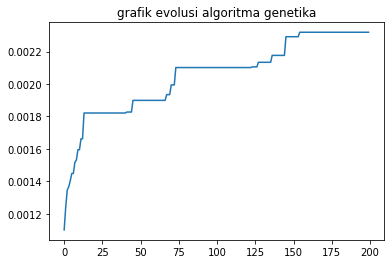

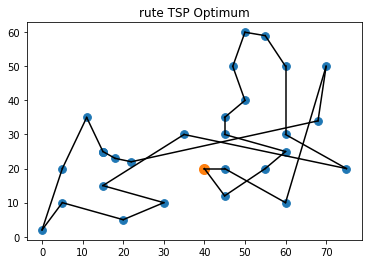

In [ ]:
#tampilan hasil optimasi
print("jarak terpendek = " + str(min_distance) + "(" + str(idx_best_kromosom) + ")" )
print("Best kromosom = " + str(best_genotipe))
f1 = plt.figure(1)
plt.title("grafik evolusi algoritma genetika")
plt.plot(list_best_fitness)
f1.show()

f2 = plt.figure(2)
x = [i[0] for i in list_lokasi]
y = [i[1] for i in list_lokasi]
plt.title("rute TSP Optimum")
for i in range(len(best_kromosom)):
  if (i == (len(best_kromosom) - 1)):
    #hubungkan titik akhir ke titik awal
    x1 = list_lokasi[best_kromosom[i]] [0]
    y1 = list_lokasi[best_kromosom[i]] [1]
    x2 = list_lokasi[best_kromosom[0]] [0]
    y2 = list_lokasi[best_kromosom[0]] [1]
  else:
    x1 = list_lokasi[best_kromosom[i]] [0]
    y1 = list_lokasi[best_kromosom[i]] [1]
    x2 = list_lokasi[best_kromosom[i+1]] [0]
    y2 = list_lokasi[best_kromosom[i+1]] [1]
  plt.plot([x1,x2], [y1,y2], 'k-')

plt.scatter(x, y, s=60)
plt.scatter(list_lokasi[best_kromosom[0]][0], list_lokasi[best_kromosom[0]][1], s=100)
f2.show()

plt.waitforbuttonpress
    